### Single Chromosome Simulation

This tutorial should take between 5 to 15 minutes of reading and performing simulations.

#### Chromatin Dynamics Simulations on Chromosome 10 of GM12878 Cell Line

The first step is to import the **OpenMiChroM** module

In [1]:
import sys

sys.path.insert(0, '/Users/matheusmello/Library/CloudStorage/OneDrive-Personal/Ph.D/OpenMiChroM/OpenMiChroM')

from ChromDynamics import MiChroM
from CndbTools import cndbTools

`MiChroM` class sets the initial parameters of the simulation:

- `time_step=0.01`: set the simulation time step to perfom the integration<br>
- `temperature=1.0`: set the temperature of your simulation<br>

In [2]:
sim = MiChroM(temperature=1.0, time_step=0.01)

    ***************************************************************************************     
     **** **** *** *** *** *** *** *** OpenMiChroM-1.0.5 *** *** *** *** *** *** **** ****      

         OpenMiChroM is a Python library for performing chromatin dynamics simulations.         
                            OpenMiChroM uses the OpenMM Python API,                             
                employing the MiChroM (Minimal Chromatin Model) energy function.                
      The chromatin dynamics simulations generate an ensemble of 3D chromosomal structures      
      that are consistent with experimental Hi-C maps, also allows simulations of a single      
                 or multiple chromosome chain using High-Performance Computing                  
                            in different platforms (GPUs and CPUs).                             
         OpenMiChroM documentation is available at https://open-michrom.readthedocs.io          

         OpenMiChroM is desc

There are four hardware platform options to run the simulations: 
```python
platform="cuda"
platform="opencl"
platform="hip"
platform="cpu"
```

Choose accordingly.

In [3]:
sim.setup(platform="opencl")

Set the directory name in which the output of the simulation is saved:

In [4]:
sim.saveFolder('output_chr10')

The next step is to load the chromatin compartment sequence for chromosome 10 and generate an initial 3D structure to start the simulation. We can use the [createSpringSpiral](https://open-michrom.readthedocs.io/en/latest/OpenMiChroM.html#OpenMiChroM.ChromDynamics.MiChroM.createSpringSpiral) function to set the initial configuration of the polymer based in the sequence file.

The first column of the sequence file should contain the locus index. The second should have the locus type annotation. A template file of the chromatin sequence of types can be found [here](https://github.com/junioreif/OpenMiChroM/blob/main/Tutorials/inputs/chr10_beads.txt).<br>

The loci positions are stored in the variable **chr10** as a NumPy array $[N:3]$, where $N$ is the number of beads. 

In [5]:
chr10 = sim.createSpringSpiral(ChromSeq='inputs/chr10_beads.txt', isRing=False)

We can check the position of the first five beads:

In [6]:
print(chr10[:5])

[[410.61654383 221.72955137 221.17249751]
 [410.62605506 222.10093022 222.10093022]
 [410.61654383 222.47230906 223.02936292]
 [410.5880139  222.84357838 223.95743532]
 [410.54047655 223.21462872 224.88478724]]


The initial structure should then be loaded into the `sim` object.

The option `center=True` moves your system to the origin.

In [7]:
sim.loadStructure(chr10, center=True)

The initial 3D chromosome structure can be saved in [.ndb file format](https://ndb.rice.edu/ndb-format). The file is stored in the path given in `saveFolder`.

In [8]:
sim.saveStructure(mode='ndb')

The next step is to add the force field in the simulation object `sim`.

In this tutorial, the forces can be divided into two sets:

**MiChroM Homopolymer (Bonded) Potentials**  

In [9]:
sim.addFENEBonds(kfb=30.0)
sim.addAngles(ka=2.0)
sim.addRepulsiveSoftCore(Ecut=4.0)

**MiChroM Non-Bonded Potentials**

In [10]:
sim.addTypetoType(mu=3.22, rc=1.78)
sim.addIdealChromosome(mu=3.22, rc=1.78, dinit=3, dend=500)

The last potential adds a spherical constrain to collapse the initial structure.

In [11]:
sim.addFlatBottomHarmonic(kr=5*10**-3, n_rad=15.0)

Run a short simulation to generate a collapsed structure.

In [12]:
block = 3*10**2
n_blocks = 2*10**1

Two variables control the chromatin dynamics simulation steps:

`block`: The number of time-steps performed in each cycle (or block)</br>
`n_blocks`: The number of cycles (or blocks) simulated. 

The initial collapse simulation will run for  $3\times10^2 \times  2\times10^3 = 6\times10^5$ time-steps.

In [13]:
for _ in range(n_blocks):
    sim.runSimBlock(block, increment=True) 

Number of exceptions: 2711
adding force  FENEBond 0
adding force  AngleForce 1
Add exclusions for RepulsiveSoftCore force
adding force  RepulsiveSoftCore 2
Add exclusions for TypetoType force
adding force  TypetoType 3
Add exclusions for IdealChromosome force
adding force  IdealChromosome 4
adding force  FlatBottomHarmonic 5
Positions... 
 loaded!
potential energy is 64.292854
bl=1 pos[1]=[209.7 -9.9 -0.5] dr=0.63 t=0.0ps kin=1.31 pot=64.78 Rg=146.803 SPS=138 
bl=2 pos[1]=[208.1 -9.9 2.2] dr=1.13 t=0.0ps kin=1.87 pot=64.12 Rg=145.956 SPS=512 
bl=3 pos[1]=[205.9 -10.2 4.3] dr=1.47 t=0.0ps kin=2.36 pot=63.23 Rg=144.746 SPS=522 
bl=4 pos[1]=[203.9 -10.3 5.5] dr=1.70 t=0.0ps kin=2.72 pot=62.30 Rg=143.287 SPS=547 
bl=5 pos[1]=[201.4 -10.5 5.1] dr=1.85 t=0.0ps kin=2.93 pot=61.28 Rg=141.658 SPS=381 
bl=6 pos[1]=[199.5 -10.5 5.6] dr=1.93 t=0.0ps kin=3.07 pot=60.21 Rg=139.928 SPS=445 
bl=7 pos[1]=[196.9 -10.5 6.6] dr=1.98 t=0.0ps kin=3.14 pot=59.16 Rg=138.139 SPS=391 
bl=8 pos[1]=[194.5 -10.6 7

Details about the output of each simulation block:

- `bl=0`: index number of the simulated block. The parameter `increment=False` is used to ignore the steps counting.<br>
- `pos[1]=[X,Y,Z]`: spatial position for the locus 1. <br>
- `dr=1.26`: average of the loci displacements in each block (in units of sigma). <br>
- `t=0`: current simulation time. **why always zero??**<br>
- `kin=1.5`: kinetic energy of the system (reduced units).<br>
- `pot=19.90`: total potential energy of the system (reduced units). <br>
- `RG=7.654`: radius of gyration at the end of the simulated block. <br>
- `SPS=12312`: steps per second of each block.

The radius of gyration is a good parameter to check the performance of the collapse.
If the chromosome polymer is not collapsed, it is necessary to rerun the initial collapse steps. We can also save the structure for inspection.

In [14]:
print(sim.chromRG())
sim.saveStructure(mode='ndb')

115.311874


The structure can also be saved using stardard file formats used for macromolecules, as the `pdb` and `gro` formats.

In [15]:
sim.saveStructure(mode='gro')
sim.saveStructure(mode='pdb')

The next step is to remove the spherical constrain force to run the production simulation.

In [16]:
sim.removeFlatBottomHarmonic()

If necessary, one could remove any of the forces applied in the system. To see the forces in the system:

In [17]:
sim.forceDict

{'FENEBond': <openmm.openmm.CustomBondForce; proxy of <Swig Object of type 'OpenMM::CustomBondForce *' at 0x141bc6510> >,
 'AngleForce': <openmm.openmm.CustomAngleForce; proxy of <Swig Object of type 'OpenMM::CustomAngleForce *' at 0x11477f060> >,
 'RepulsiveSoftCore': <openmm.openmm.CustomNonbondedForce; proxy of <Swig Object of type 'OpenMM::CustomNonbondedForce *' at 0x113979630> >,
 'TypetoType': <openmm.openmm.CustomNonbondedForce; proxy of <Swig Object of type 'OpenMM::CustomNonbondedForce *' at 0x10d994fc0> >,
 'IdealChromosome': <openmm.openmm.CustomNonbondedForce; proxy of <Swig Object of type 'OpenMM::CustomNonbondedForce *' at 0x11477f360> >}

In [18]:
# sim.removeForce(forceName="TypetoType")

To run the production simulation, it is necessary to initialize the .cndb file to save the chromatin dynamics trajectory.

In [19]:
sim.initStorage(filename="traj_chr10")

Set the parameters of the production simulation:

$block = 5\times10^2$ </br> 
$n\_blocks = 2\times10^3$ 

In [20]:
block = 5*10**2
n_blocks = 2*10**1

In [21]:
for _ in range(n_blocks):
    sim.runSimBlock(block, increment=True) 
    sim.saveStructure()

bl=21 pos[1]=[156.4 -5.1 13.0] dr=2.44 t=0.0ps kin=2.02 pot=21.19 Rg=113.213 SPS=159 
bl=22 pos[1]=[154.7 -4.7 12.0] dr=1.80 t=0.0ps kin=1.70 pot=21.19 Rg=111.910 SPS=501 
bl=23 pos[1]=[153.8 -3.8 9.9] dr=1.48 t=0.0ps kin=1.53 pot=21.21 Rg=111.092 SPS=488 
bl=24 pos[1]=[151.4 -4.2 9.2] dr=1.34 t=0.0ps kin=1.52 pot=21.18 Rg=110.590 SPS=436 
bl=25 pos[1]=[150.4 -4.2 9.4] dr=1.25 t=0.0ps kin=1.54 pot=21.15 Rg=110.250 SPS=481 
bl=26 pos[1]=[150.5 -4.9 8.5] dr=1.25 t=0.0ps kin=1.48 pot=21.15 Rg=110.016 SPS=516 
bl=27 pos[1]=[151.9 -5.9 7.8] dr=1.25 t=0.0ps kin=1.50 pot=21.17 Rg=109.860 SPS=461 
bl=28 pos[1]=[151.6 -7.7 10.2] dr=1.26 t=0.0ps kin=1.46 pot=21.15 Rg=109.767 SPS=447 
bl=29 pos[1]=[151.1 -8.2 11.4] dr=1.24 t=0.0ps kin=1.53 pot=21.18 Rg=109.686 SPS=514 
bl=30 pos[1]=[150.8 -6.8 11.0] dr=1.24 t=0.0ps kin=1.51 pot=21.17 Rg=109.603 SPS=466 
bl=31 pos[1]=[150.9 -8.1 11.4] dr=1.25 t=0.0ps kin=1.52 pot=21.16 Rg=109.568 SPS=479 
bl=32 pos[1]=[150.6 -8.4 11.9] dr=1.24 t=0.0ps kin=1.49 pot

Once the simulation is completed, it is necessary to close the .cndb file to avoid losing the trajectory data.

In [22]:
sim.storage[0].close()

The simulation should generate the `traj_chr10_0.cndb` trajectory file in the output_chr10 folder. This file contains 2000 frames (one snapshot per block).

#### Trajectory analysis using cndbTools

`cndbTools` is a class that allows analyses in the chromatin dynamics trajectories using the binary format [.cndb](https://ndb.rice.edu/ndb-format) (compact ndb).

In [2]:
cndbTools = cndbTools()

Load the cndb file in the variable `chr10_traj`.

In [3]:
chr10_traj = cndbTools.load('output_chr10/traj_chr10_0.cndb')

In [4]:
print(chr10_traj) # Print the information of the cndb trajectory.

Cndb file has 20 frames, with 2712 beads and {'A2', 'NA', 'B3', 'B2', 'B1', 'A1'} types 


Extract the loci XYZ position over the simulated 2000 frames and save in the variable `chr10_xyz`.

In [5]:
chr10_xyz = cndbTools.xyz(frames=[21,41,1], beadSelection='all', XYZ=[0,1,2])

The variable `chr10_xyz` allows the cndbTools to perform several analyses.
In this example, the radius of gyration can be obtained as a function of the simulated frames.

Text(0.5, 0, 'Simulation Frames')

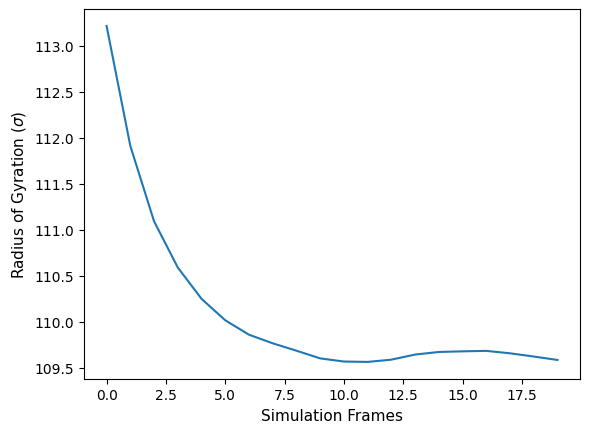

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl


chr10_RG = cndbTools.compute_RG(chr10_xyz)
plt.plot(chr10_RG)
plt.ylabel(r'Radius of Gyration ($\sigma$)',fontsize=11)
plt.xlabel(r'Simulation Frames',fontsize=11)

`cndbTools` allows the selection of beads to compute the analyses. An example is the Radial Distribution Probability (RDP) for each chromatin subcompartments A1 and B1.

In [7]:
chr10_A1 = cndbTools.xyz(frames=[21,41,1], beadSelection=chr10_traj.dictChromSeq['A1'], XYZ=[0,1,2])
chr10_B1 = cndbTools.xyz(frames=[21,41,1], beadSelection=chr10_traj.dictChromSeq['B1'], XYZ=[0,1,2])

In [21]:
print("Computing RDP...")
r_A1, RDP_chr10_A1 = cndbTools.compute_RDP(chr10_A1, radius=15.0, bins=200)
r_B1, RDP_chr10_B1 = cndbTools.compute_RDP(chr10_B1, radius=15.0, bins=200)

Computing RDP...


(0.005, 15.0)

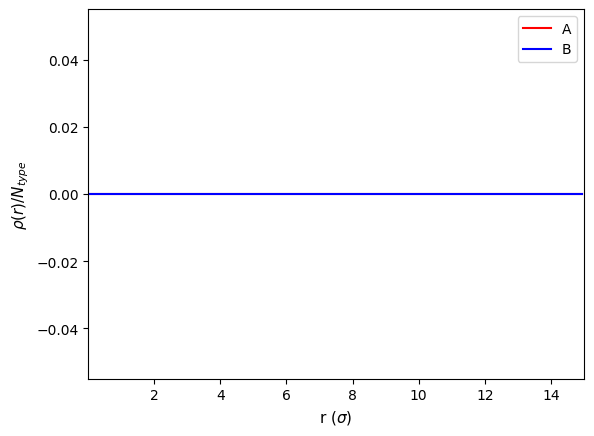

In [22]:
plt.plot(r_A1, RDP_chr10_A1, color='red', label='A')
plt.plot(r_B1, RDP_chr10_B1, color='blue', label='B')
plt.xlabel(r'r ($\sigma$)', fontsize=11,fontweight='normal', color='k')
plt.ylabel(r'$\rho(r)/N_{type}$', fontsize=11,fontweight='normal', color='k')
plt.legend()
plt.gca().set_xlim([1/200,15.0])

We can also use `cndbTools` to generate the *in silico* Hi-C map (contact probability matrix).

In this tutorial, the trajectory contains 2,000 snapshots of chromosome 10 of the GM12878 cell line. For this set of structures, we expect the *in silico* Hi-C to not be fully converged due to inadequate sampling. 
To produce a converged map, it is recommended to simulate around 20 replicas with 10,000 frames on each, which generates an ensemble of 200,000 chromosome structures.

In [23]:
print("Generating the contact probability matrix...")
chr10_sim_HiC = cndbTools.traj2HiC(chr10_xyz)

Generating the contact probability matrix...
Reading frame 0 of 20


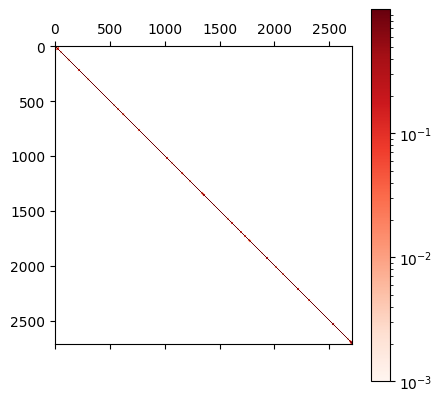

In [24]:
plt.matshow(chr10_sim_HiC, norm=mpl.colors.LogNorm(vmin=0.001, vmax=chr10_sim_HiC.max()),cmap="Reds")  
plt.colorbar()

To visualize the chromosome's 3D structures in the standard visualization softwares for macromolecules, there are available scripts for converting the `ndb`/`cndb` file format to `.pdb` and `.gro`. For details, please check the [Nucleome Data Bank](https://ndb.rice.edu/ndb-format).

The `ndb` plugin for visualizing the chromatin dynamics trajectories in VMD/Chimera/Pymol is under development.